In [1]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


import wave

TensorFlow version: 2.6.0


In [2]:
import librosa
import pandas as pd
import os
import numpy as np
from tqdm import tqdm

from sklearn.model_selection import train_test_split 
from sklearn.preprocessing import LabelEncoder

import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , Activation , Dropout

import IPython.display as ip

In [3]:
#importing  libraries
#Keras
import tensorflow.keras
from tensorflow.keras import regularizers, layers
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential, Model, model_from_json
from tensorflow.keras.layers import Dense, Embedding, LSTM
from tensorflow.keras.layers import Input, Flatten, Dropout, Activation, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling1D
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

#sklearn
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

#Others
import librosa
import librosa.display
import json
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import tensorflow as tf
import pandas as pd
import seaborn as sns
import glob
import os
import pickle
import IPython.display as ipd
import csv
from tqdm import tqdm
import os


import sys
import os
import IPython
import math
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
%matplotlib inline

import random
from datetime import datetime
#from include import helpers

from tensorflow.keras import backend as keras_backend
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, SpatialDropout2D, Activation, Conv2D, MaxPooling2D, BatchNormalization, GlobalAveragePooling2D, LeakyReLU
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint 
from tensorflow.keras.regularizers import l2

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix

In [4]:
#split the dataset into train and test
X_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_train_mel.csv')
y_train = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_train_mel.csv')
X_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/X_test_mel.csv')
y_test = pd.read_csv('https://raw.githubusercontent.com/fatmaaerr/ML_Urbansound8k_project/main/Data/y_test_mel.csv')
#take a peak at the data
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((4499, 1), (4499, 1), (4233, 2), (4233, 2))

In [5]:
#One hot encode labels

le = LabelEncoder()

def encoding_y(data):
  data = np.array(data['label'])
  data = to_categorical(le.fit_transform(data))
  return data

y_train = encoding_y(y_train)
y_test = encoding_y(y_test)

In [6]:
X_test = X_test.iloc[:,1:41]

def standardization(data):
  mean = np.mean(data,axis=0)
  std = np.std(data, axis=0)
  data =( data - mean)/std
  data = np.array(data)
  data=np.reshape(data,(data.shape[0], 1, 1))
  return data

X_train = standardization(X_train)
X_test = standardization(X_test)

In [7]:
model = tf.keras.Sequential(
    [
     tf.keras.layers.LSTM(
         units=128,activation='relu',
         return_sequences=True,
         input_shape=(1,1)
     ),
     tf.keras.layers.LSTM(
         units=64,activation='relu'
     ),
     tf.keras.layers.Dense(
         units=32,
         activation='relu'
     ),

     tf.keras.layers.Dense(
         units=10,
         activation='softmax'
     )

    ]
)

In [8]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=["accuracy"])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________


In [9]:
print("Train...")
model_mel=model.fit(X_train, y_train, batch_size=256, epochs=250, validation_data=(X_test, y_test))

Train...
Epoch 1/250
18/18 [==============================] - 3s 33ms/step - loss: 2.2996 - accuracy: 0.1205 - val_loss: 2.2975 - val_accuracy: 0.1082
Epoch 2/250
18/18 [==============================] - 0s 7ms/step - loss: 2.2919 - accuracy: 0.1234 - val_loss: 2.2906 - val_accuracy: 0.1087
Epoch 3/250
18/18 [==============================] - 0s 7ms/step - loss: 2.2812 - accuracy: 0.1265 - val_loss: 2.2806 - val_accuracy: 0.1106
Epoch 4/250
18/18 [==============================] - 0s 7ms/step - loss: 2.2657 - accuracy: 0.1311 - val_loss: 2.2674 - val_accuracy: 0.1136
Epoch 5/250
18/18 [==============================] - 0s 7ms/step - loss: 2.2466 - accuracy: 0.1749 - val_loss: 2.2527 - val_accuracy: 0.1614
Epoch 6/250
18/18 [==============================] - 0s 9ms/step - loss: 2.2267 - accuracy: 0.1923 - val_loss: 2.2377 - val_accuracy: 0.1606
Epoch 7/250
18/18 [==============================] - 0s 8ms/step - loss: 2.2080 - accuracy: 0.1847 - val_loss: 2.2248 - val_accuracy: 0.1616
Epo

18/18 [==============================] - 0s 6ms/step - loss: 2.1285 - accuracy: 0.2105 - val_loss: 2.1974 - val_accuracy: 0.1831
Epoch 59/250
18/18 [==============================] - 0s 7ms/step - loss: 2.1267 - accuracy: 0.2114 - val_loss: 2.1933 - val_accuracy: 0.1828
Epoch 60/250
18/18 [==============================] - 0s 7ms/step - loss: 2.1258 - accuracy: 0.2134 - val_loss: 2.1945 - val_accuracy: 0.1807
Epoch 61/250
18/18 [==============================] - 0s 6ms/step - loss: 2.1267 - accuracy: 0.2100 - val_loss: 2.1980 - val_accuracy: 0.1826
Epoch 62/250
18/18 [==============================] - 0s 7ms/step - loss: 2.1253 - accuracy: 0.2160 - val_loss: 2.1966 - val_accuracy: 0.1862
Epoch 63/250
18/18 [==============================] - 0s 7ms/step - loss: 2.1252 - accuracy: 0.2112 - val_loss: 2.1979 - val_accuracy: 0.1814
Epoch 64/250
18/18 [==============================] - 0s 7ms/step - loss: 2.1252 - accuracy: 0.2145 - val_loss: 2.1954 - val_accuracy: 0.1862
Epoch 65/250
18/18 

Epoch 116/250
18/18 [==============================] - 0s 9ms/step - loss: 2.1127 - accuracy: 0.2203 - val_loss: 2.2026 - val_accuracy: 0.1883
Epoch 117/250
18/18 [==============================] - 0s 8ms/step - loss: 2.1118 - accuracy: 0.2205 - val_loss: 2.1999 - val_accuracy: 0.1876
Epoch 118/250
18/18 [==============================] - 0s 9ms/step - loss: 2.1110 - accuracy: 0.2158 - val_loss: 2.1927 - val_accuracy: 0.1897
Epoch 119/250
18/18 [==============================] - 0s 9ms/step - loss: 2.1111 - accuracy: 0.2178 - val_loss: 2.2084 - val_accuracy: 0.1864
Epoch 120/250
18/18 [==============================] - 0s 9ms/step - loss: 2.1122 - accuracy: 0.2245 - val_loss: 2.1958 - val_accuracy: 0.1871
Epoch 121/250
18/18 [==============================] - 0s 9ms/step - loss: 2.1108 - accuracy: 0.2227 - val_loss: 2.1999 - val_accuracy: 0.1871
Epoch 122/250
18/18 [==============================] - 0s 9ms/step - loss: 2.1098 - accuracy: 0.2198 - val_loss: 2.1958 - val_accuracy: 0.1906

18/18 [==============================] - 0s 9ms/step - loss: 2.1011 - accuracy: 0.2227 - val_loss: 2.2007 - val_accuracy: 0.1968
Epoch 174/250
18/18 [==============================] - 0s 8ms/step - loss: 2.0999 - accuracy: 0.2263 - val_loss: 2.2055 - val_accuracy: 0.1935
Epoch 175/250
18/18 [==============================] - 0s 9ms/step - loss: 2.0993 - accuracy: 0.2307 - val_loss: 2.1980 - val_accuracy: 0.1961
Epoch 176/250
18/18 [==============================] - 0s 8ms/step - loss: 2.0992 - accuracy: 0.2263 - val_loss: 2.2083 - val_accuracy: 0.1932
Epoch 177/250
18/18 [==============================] - 0s 8ms/step - loss: 2.1008 - accuracy: 0.2285 - val_loss: 2.2039 - val_accuracy: 0.1968
Epoch 178/250
18/18 [==============================] - 0s 9ms/step - loss: 2.0994 - accuracy: 0.2281 - val_loss: 2.2027 - val_accuracy: 0.1951
Epoch 179/250
18/18 [==============================] - 0s 9ms/step - loss: 2.0992 - accuracy: 0.2278 - val_loss: 2.2055 - val_accuracy: 0.1949
Epoch 180/250

18/18 [==============================] - 0s 9ms/step - loss: 2.0975 - accuracy: 0.2234 - val_loss: 2.2048 - val_accuracy: 0.1921
Epoch 231/250
18/18 [==============================] - 0s 9ms/step - loss: 2.0970 - accuracy: 0.2252 - val_loss: 2.2112 - val_accuracy: 0.1904
Epoch 232/250
18/18 [==============================] - 0s 8ms/step - loss: 2.0969 - accuracy: 0.2249 - val_loss: 2.2146 - val_accuracy: 0.1930
Epoch 233/250
18/18 [==============================] - 0s 8ms/step - loss: 2.0963 - accuracy: 0.2278 - val_loss: 2.2048 - val_accuracy: 0.1923
Epoch 234/250
18/18 [==============================] - 0s 8ms/step - loss: 2.0953 - accuracy: 0.2245 - val_loss: 2.2010 - val_accuracy: 0.1878
Epoch 235/250
18/18 [==============================] - 0s 8ms/step - loss: 2.0968 - accuracy: 0.2292 - val_loss: 2.2037 - val_accuracy: 0.1954
Epoch 236/250
18/18 [==============================] - 0s 8ms/step - loss: 2.0951 - accuracy: 0.2276 - val_loss: 2.2085 - val_accuracy: 0.1914
Epoch 237/250

In [10]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(X_test, y_test, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 1, 128)            66560     
_________________________________________________________________
lstm_1 (LSTM)                (None, 64)                49408     
_________________________________________________________________
dense (Dense)                (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
Total params: 118,378
Trainable params: 118,378
Non-trainable params: 0
_________________________________________________________________
133/133 [==============================] - 1s 1ms/step - loss: 2.2055 - accuracy: 0.1963
Pre-training accuracy: 19.6315%


In [11]:
score = model.evaluate(X_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(X_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.228272944688797
Testing Accuracy:  0.19631467759609222


In [12]:
test_accuracy=model.evaluate(X_test,y_test,verbose=0)
print(test_accuracy[1])

0.19631467759609222


In [13]:
#model.predict_classes(X_test)
predict_x=model.predict(X_test) 
classes_x=np.argmax(predict_x,axis=1)
print(classes_x)

[7 2 2 ... 2 2 2]


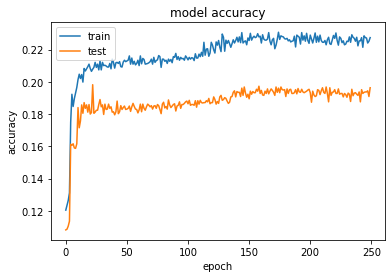

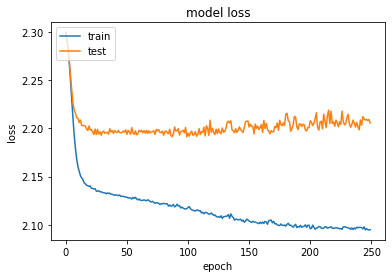

In [14]:
# summarize history for accuracy
plt.plot(model_mel.history['accuracy'])
plt.plot(model_mel.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(model_mel.history['loss'])
plt.plot(model_mel.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [15]:
train_hist = pd.DataFrame(model_mel.history)
train_hist

,loss,accuracy,val_loss,val_accuracy
0,2.299587,0.120471,2.297468,0.108197
1,2.291942,0.123361,2.290556,0.108670
2,2.281177,0.126473,2.280632,0.110560
3,2.265676,0.131140,2.267441,0.113631
4,2.246591,0.174928,2.252715,0.161351
...,...,...,...,...
245,2.094706,0.227384,2.208611,0.193716
246,2.096007,0.227162,2.209193,0.193716
247,2.094831,0.224050,2.207923,0.194425
248,2.094624,0.225161,2.209171,0.190881


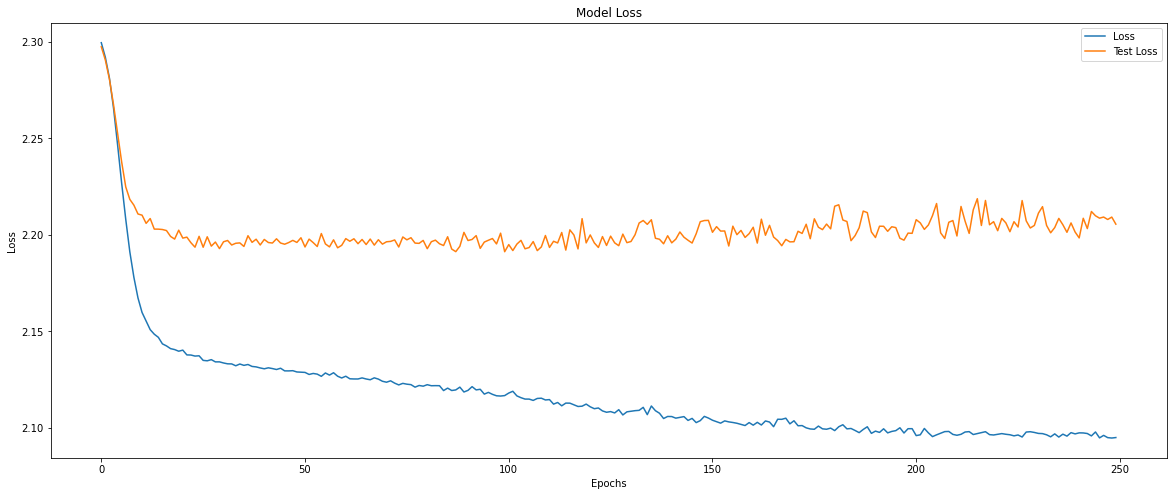

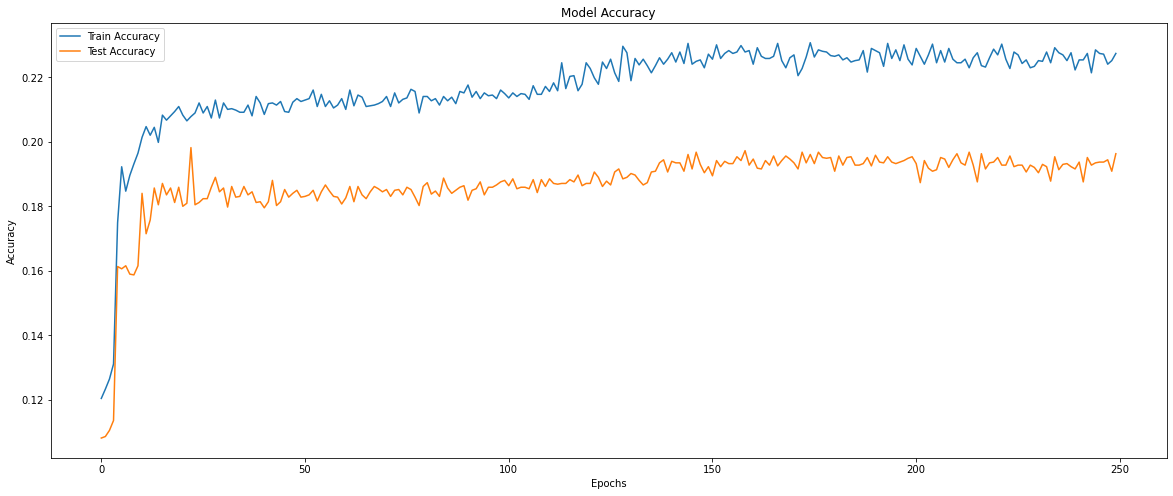

In [16]:
plt.figure(figsize=(20,8))
plt.plot(train_hist[['loss','val_loss']])
plt.legend(['Loss','Test Loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

plt.figure(figsize=(20,8))
plt.plot(train_hist[['accuracy','val_accuracy']])
plt.legend(['Train Accuracy','Test Accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()

In [17]:
ytrue = np.argmax(y_test,axis=1)
ypred = np.argmax(model.predict(X_test),axis=1)
print('\nConfusion Matrix :\n\n')
print(confusion_matrix(ytrue,ypred))
print('\n\nClassification Report : \n\n',classification_report(ytrue,ypred))


Confusion Matrix :


[[ 72   0 163   0  52  15   4 193   1   0]
 [ 33   0  41   0  18  20   1 102   6   0]
 [ 29   0 390   0  33   8   3  29   8   0]
 [ 44   0 211   5  41  28   9 130  32   0]
 [ 88   0 141   1  70  43   3 152   2   0]
 [ 82   0 152  55  42  31  11  60  50   0]
 [ 14   0  42   4  11  16  22  45  30   0]
 [ 48   0 176   0  61   6   0 157   4   0]
 [ 16   0 180   1  32  19  12  49  84   0]
 [ 61   0 136   5  54  50   7 157  30   0]]


Classification Report : 

               precision    recall  f1-score   support

           0       0.15      0.14      0.15       500
           1       0.00      0.00      0.00       221
           2       0.24      0.78      0.37       500
           3       0.07      0.01      0.02       500
           4       0.17      0.14      0.15       500
           5       0.13      0.06      0.09       483
           6       0.31      0.12      0.17       184
           7       0.15      0.35      0.21       452
           8       0.34      0.

C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\fatma.er\Anaconda3\envs\Mylovelyproject\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_sta